<a href="https://colab.research.google.com/github/syahdannoor/Disability_4/blob/Syahdan/152236035101_539_Syahdan_Noor_BISINDO_Alfabet_Disability_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2

from tensorflow import keras
from keras import layers
from keras.models import Sequential

# Datasets BISINDO

In [2]:
data_dir = tf.keras.utils.get_file(
    'Citra BISINDO',
    #private
    'https://media.githubusercontent.com/media/syahdannoor/Disability_4/Syahdan/dataset/Citra%20BISINDO.tgz?token=AE55EQY6XUL5ZU2B2CXDVIDC23YMQ',
    #public
    #'https://media.githubusercontent.com/media/syahdannoor/Disability_4/main/dataset/Citra%20BISINDO.tgz',

    untar=True)

120168448/120159400 [==============================] - 0s 0us/step


## posix

In [3]:
import pathlib
data_dir = pathlib.Path('/root/.keras/datasets/Citra BISINDO')
data_dir

PosixPath('/root/.keras/datasets/Citra BISINDO')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

312


# Load data using Keras

In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 312 files belonging to 26 classes.
Using 250 files for training.


In [7]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 312 files belonging to 26 classes.
Using 62 files for validation.


In [8]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


# Visualize data

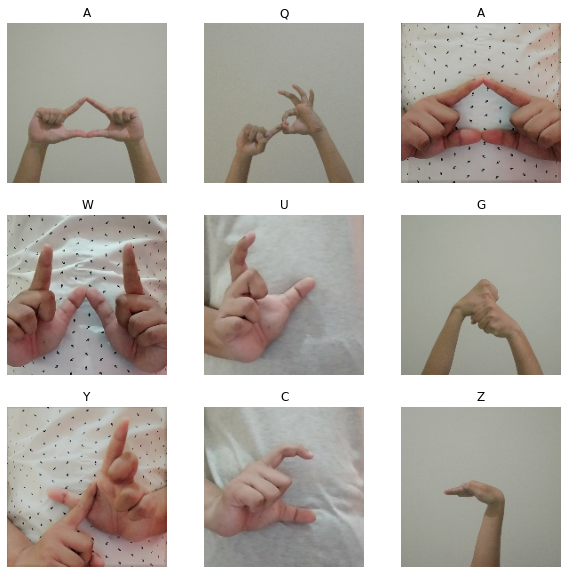

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)

In [13]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9385229


# no augmentation

In [14]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
8/8 [==============================] - 13s 179ms/step - loss: 3.4199 - accuracy: 0.0240 - val_loss: 3.2603 - val_accuracy: 0.0323
Epoch 2/10
8/8 [==============================] - 0s 32ms/step - loss: 3.2507 - accuracy: 0.0560 - val_loss: 3.2709 - val_accuracy: 0.0323
Epoch 3/10
8/8 [==============================] - 0s 25ms/step - loss: 3.2336 - accuracy: 0.0680 - val_loss: 3.2369 - val_accuracy: 0.0806
Epoch 4/10
8/8 [==============================] - 0s 26ms/step - loss: 3.1747 - accuracy: 0.1080 - val_loss: 3.1726 - val_accuracy: 0.1129
Epoch 5/10
8/8 [==============================] - 0s 25ms/step - loss: 2.9931 - accuracy: 0.2160 - val_loss: 2.9282 - val_accuracy: 0.2419
Epoch 6/10
8/8 [==============================] - 0s 25ms/step - loss: 2.6262 - accuracy: 0.3040 - val_loss: 2.4790 - val_accuracy: 0.2742
Epoch 7/10
8/8 [==============================] - 0s 25ms/step - loss: 2.1559 - accuracy: 0.3880 - val_loss: 2.1530 - val_accuracy: 0.3387
Epoch 8/10
8/8 [=========

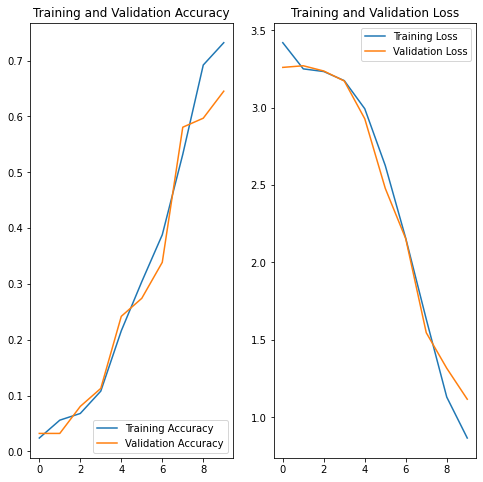

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# with augmentation

In [19]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2)
  ]
)

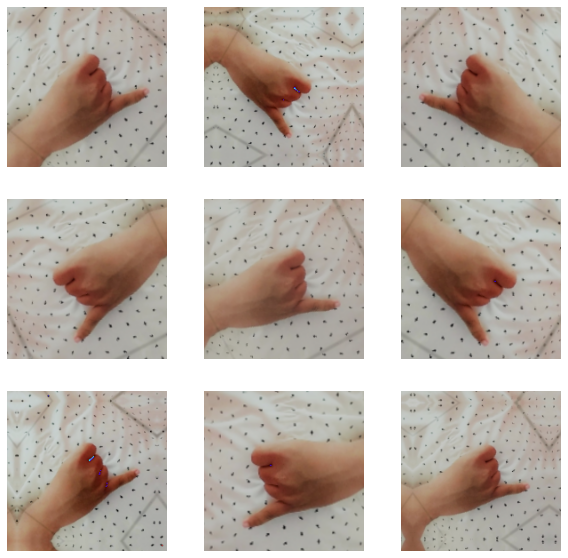

In [20]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [21]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                  

In [24]:

epochstep = 8
epochs = 100
history = model.fit(
  train_ds,
  steps_per_epoch = epochstep,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
8/8 [==============================] - 2s 130ms/step - loss: 3.5294 - accuracy: 0.0280 - val_loss: 3.2587 - val_accuracy: 0.0323
Epoch 2/100
8/8 [==============================] - 0s 40ms/step - loss: 3.2613 - accuracy: 0.0320 - val_loss: 3.2613 - val_accuracy: 0.0323
Epoch 3/100
8/8 [==============================] - 0s 40ms/step - loss: 3.2630 - accuracy: 0.0280 - val_loss: 3.2653 - val_accuracy: 0.0323
Epoch 4/100
8/8 [==============================] - 0s 39ms/step - loss: 3.2586 - accuracy: 0.0280 - val_loss: 3.2606 - val_accuracy: 0.0161
Epoch 5/100
8/8 [==============================] - 0s 40ms/step - loss: 3.2576 - accuracy: 0.0440 - val_loss: 3.2657 - val_accuracy: 0.0161
Epoch 6/100
8/8 [==============================] - 0s 40ms/step - loss: 3.2582 - accuracy: 0.0480 - val_loss: 3.2743 - val_accuracy: 0.0000e+00
Epoch 7/100
8/8 [==============================] - 0s 39ms/step - loss: 3.2547 - accuracy: 0.0520 - val_loss: 3.2668 - val_accuracy: 0.0000e+00
Epoch 8/100

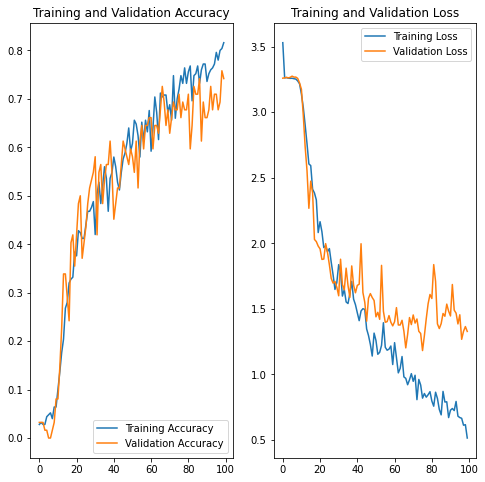

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# MODEL Prediction

Saving wall white (1).jpg to wall white (1).jpg
This image most likely belongs to C 
With a 5.06 percent confidence.


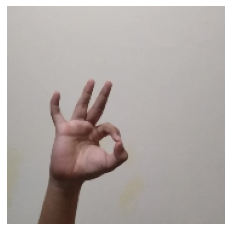

In [26]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size =(180,180))
  plt.axis('off')
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  predictions = model.predict(images, batch_size=10)
  score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} \nWith a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

# model save

In [27]:
model.save('/content/model.h5')